In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [57]:
# file_loc = C:\Users\Tejaswa\Desktop\New folder\dataset.csv'
air_pollution_data = pd.read_csv(r'C:\Users\Tejaswa\Desktop\New folder\dataset.csv', index_col=0,  header = 0)

In [58]:
air_pollution_data.head()

From To (Interval: 15M)  \
#                                       
1  01-02-2023 0.00    01-02-2023 0.15   
2  01-02-2023 0.15    01-02-2023 0.30   
3  01-02-2023 0.30    01-02-2023 0.45   
4  01-02-2023 0.45    01-02-2023 1.00   
5  01-02-2023 1.00    01-02-2023 1.15   

   Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
#                                                          
1                                               95.0       
2                                               95.0       
3                                               95.0       
4                                              122.0       
5                                              122.0       

   Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
#                                                           
1                                               35.0        
2                                               35.0        
3                                               35.0        
4                                               34.0        
5                                               34.0        

   Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
#                                                        
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     
5                                                NaN     

   Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
#                                                         
1                                               90.1      
2                                               88.0      
3                                               87.7      
4                                               88.9      
5                                               90.0      

   Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
#                                                       
1                                               56.2    
2                                               55.1    
3                                               55.2    
4                                               55.7    
5                                               55.8    

   Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
#                                                        
1                                               0.31     
2                                               0.33     
3                                               0.38     
4                                               0.38     
5                                               0.38     

   Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
#                                                         
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      
5                                                NaN      

   Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)  \
#                                                         
1                                               17.7      
2                                               18.3      
3                                               19.7      
4                                               21.3      
5                                               22.3      

   Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)  \
#                                                           
1                                               28.1        
2                                               27.1        
3                                               24.9        
4                                               21.9        
5                                               16.7   

In [59]:
data_orig = pd.DataFrame(air_pollution_data)

In [60]:
data_orig.columns = ['From','To','PM10(µg/m3)','PM2.5(µg/m3)','NO(µg/m3)','NO2(µg/m3)','NOX(ppb)','CO(µg/m3)','SO2(µg/m3)','NH3(µg/m3)','Ozone(µg/m3)','Benzene(µg/m3)']

In [61]:
data_orig.head(1)

From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                           
1  01-02-2023 0.00  01-02-2023 0.15         95.0          35.0        NaN   

   NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                          
1        90.1      56.2       0.31         NaN        17.7          28.1   

   Benzene(µg/m3)  
#                  
1             0.4

In [62]:
data_orig.shape

(8643, 12)

In [63]:
data_orig.isnull().sum()

From                 0
To                   3
PM10(µg/m3)       1681
PM2.5(µg/m3)       226
NO(µg/m3)         1369
NO2(µg/m3)         416
NOX(ppb)           415
CO(µg/m3)          496
SO2(µg/m3)        1451
NH3(µg/m3)         326
Ozone(µg/m3)       453
Benzene(µg/m3)    6195
dtype: int64

In [64]:
data = data_orig.fillna(value = 0)
data.head(1)

From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                           
1  01-02-2023 0.00  01-02-2023 0.15         95.0          35.0        0.0   

   NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                          
1        90.1      56.2       0.31         0.0        17.7          28.1   

   Benzene(µg/m3)  
#                  
1             0.4

In [65]:
data_orig.head(1)

From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                           
1  01-02-2023 0.00  01-02-2023 0.15         95.0          35.0        NaN   

   NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                          
1        90.1      56.2       0.31         NaN        17.7          28.1   

   Benzene(µg/m3)  
#                  
1             0.4

In [66]:
data_orig = data_orig[:-3]
data = data[:-3]

In [67]:
data['To'] = pd.to_datetime(data['To'], format='%d-%m-%Y %H.%M')
data['From'] = pd.to_datetime(data['From'], format='%d-%m-%Y %H.%M')

In [68]:
data.drop(['From'], axis = 1, inplace = True)

<IPython.core.display.Javascript object>


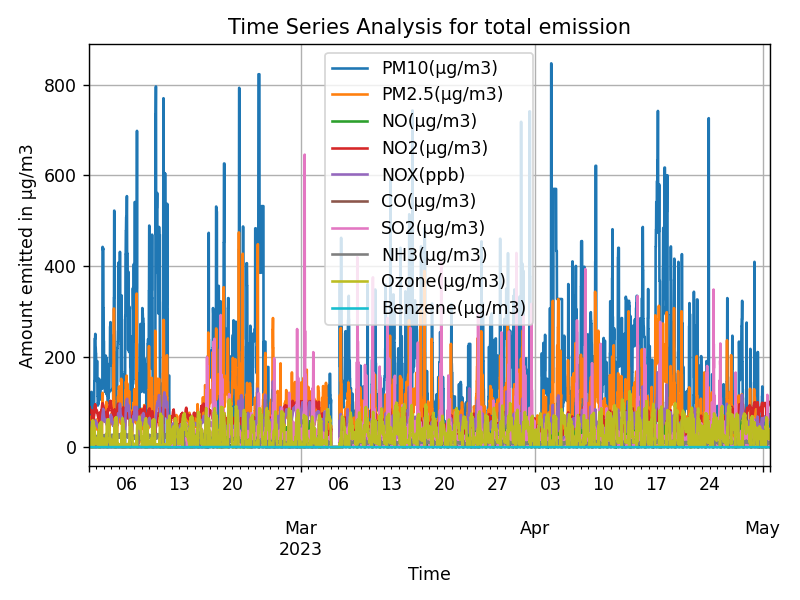

In [69]:
%matplotlib notebook
data.set_index(['To'], inplace=True)
data.plot()
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Time Series Analysis for total emission')
plt.tight_layout()
plt.grid()
plt.legend()

In [70]:
t = 6000  # Index to split the data
training_data = data.iloc[:t+1].copy()
testing_data = data.iloc[t+1:].copy()

<IPython.core.display.Javascript object>


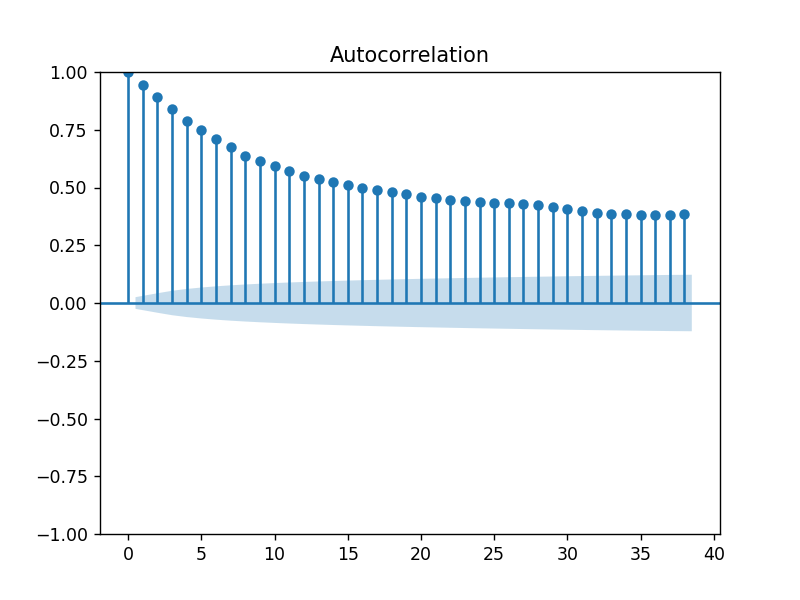

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


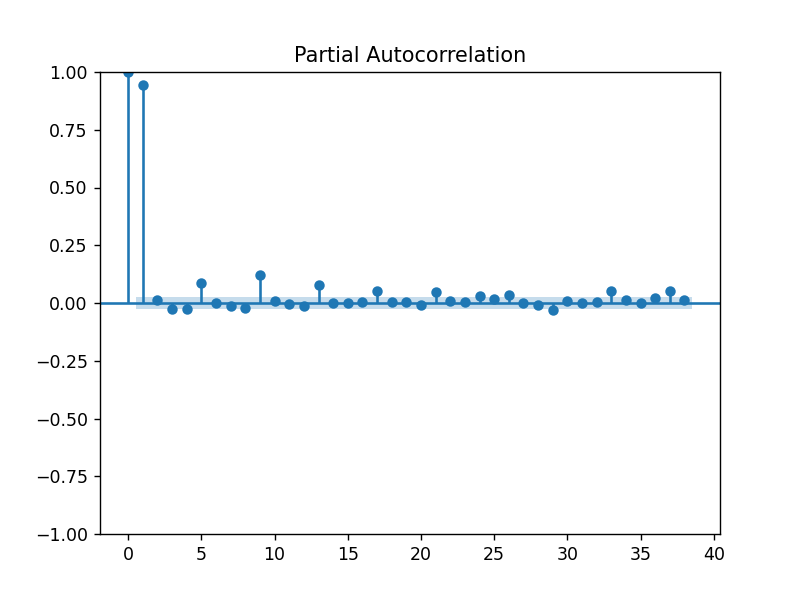

In [134]:
acf_plot = plot_acf(training_data['PM10(µg/m3)'])
pacf_plot = plot_pacf(training_data['PM10(µg/m3)'])

In [72]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(training_data['PM10(µg/m3)'])
print(f'p-value : {adf_test[1]}')

# Test for stationarity

p-value : 7.1997063727762765e-09


In [73]:
training_data_diff = training_data['PM10(µg/m3)'].diff().dropna()
training_data_diff.plot()
# Differencing to make stationary

<Axes: title={'center': 'Partial Autocorrelation'}, xlabel='To'>

<IPython.core.display.Javascript object>


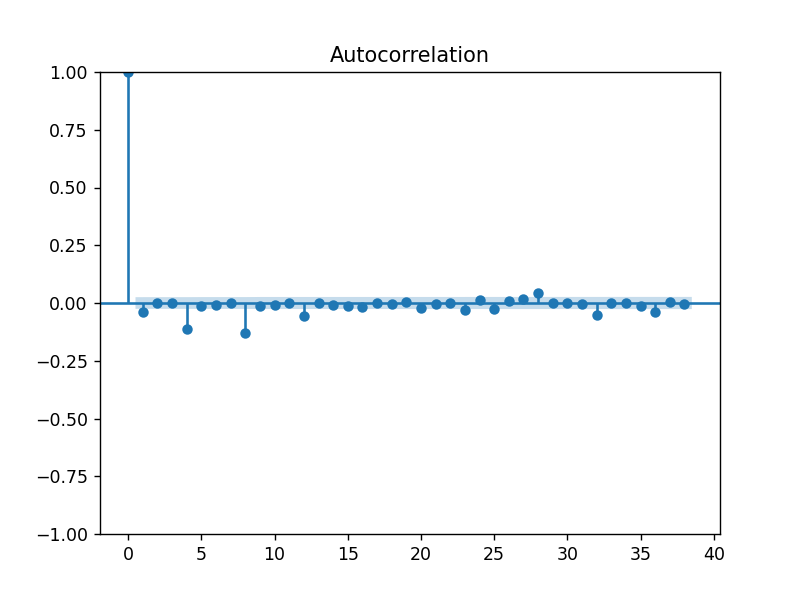

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


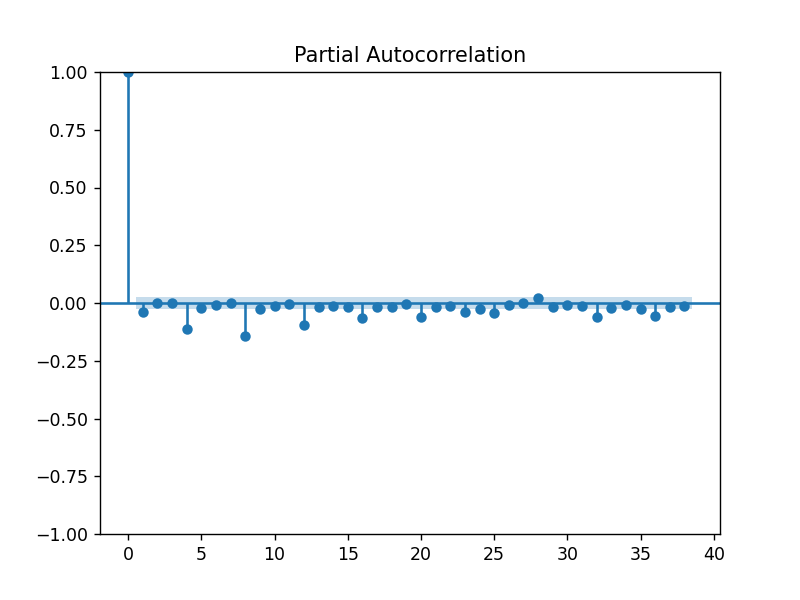

In [74]:
acf_diff = plot_acf(training_data_diff)
pacf_diff = plot_pacf(training_data_diff)
# Checking ACF and PACF plot after differnecing to check any further need of differencing

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


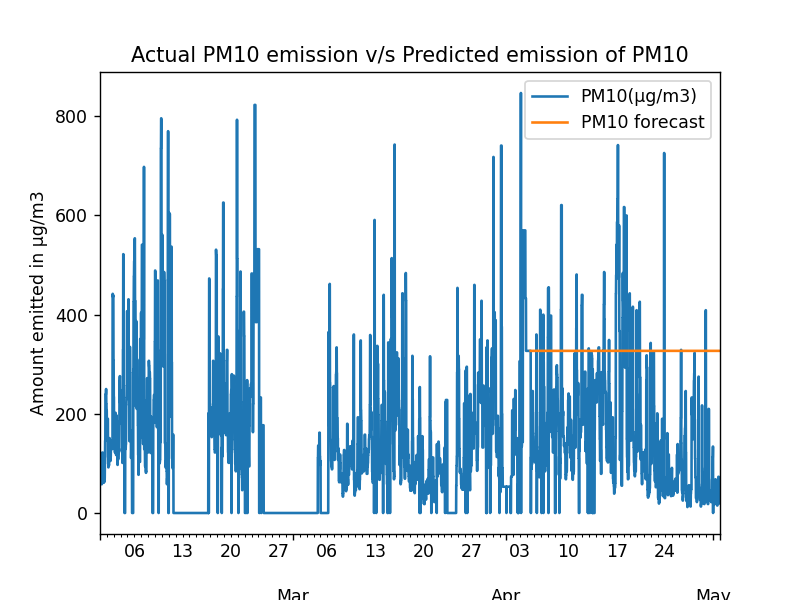

Text(0.5, 1.0, 'Actual PM10 emission v/s Predicted emission of PM10')

In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to training data
model = ARIMA(training_data['PM10(µg/m3)'], order=(5, 1, 0))
model_fit = model.fit()

# Generate forecasted values
forecast_values = model_fit.forecast(steps=len(testing_data))

# Add forecasted values to the dataset
data['PM10 forecast'] = [None] * len(training_data) + list(forecast_values)

# Plot the actual data, training data, testing data, and forecasted values
data[['PM10(µg/m3)', 'PM10 forecast']].plot()
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual PM10 emission v/s Predicted emission of PM10')

<IPython.core.display.Javascript object>


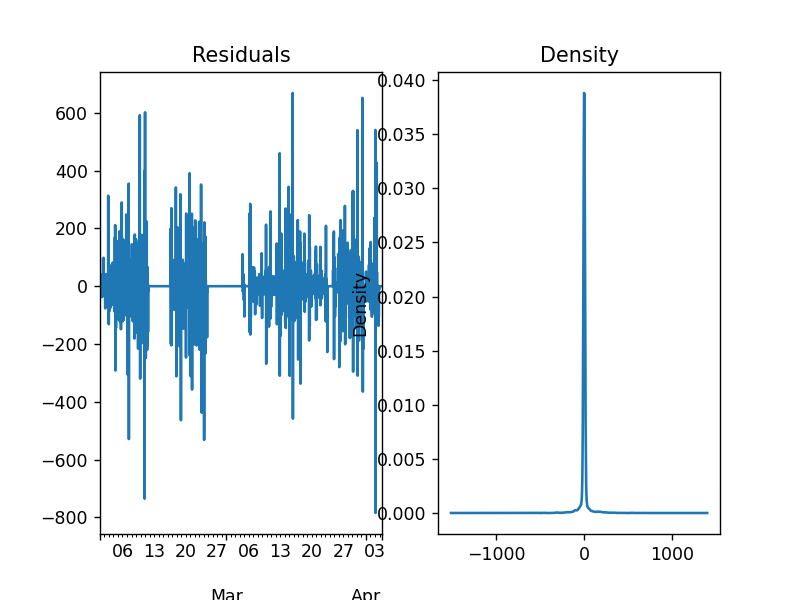

In [76]:
# Access the residuals
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()
# For a good ARIMA model Residual should be a white noise

In [77]:
# # Residuals are also white noise as it is supposed to be

In [78]:
# acf_res = plot_acf(residuals)
# pacf_res = plot_pacf(residuals)

In [79]:
# These ACF and PACF plots of residuals also shows 
# that model is good since residuals plot is white noise

In [80]:
import pmdarima as pm
auto_arima = pm.auto_arima(training_data['PM10(µg/m3)'], stepwise = False, seasonal = False)
auto_arima
# Automatic method to check best ARIMA model

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [26]:
# auto_arima.summary()

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


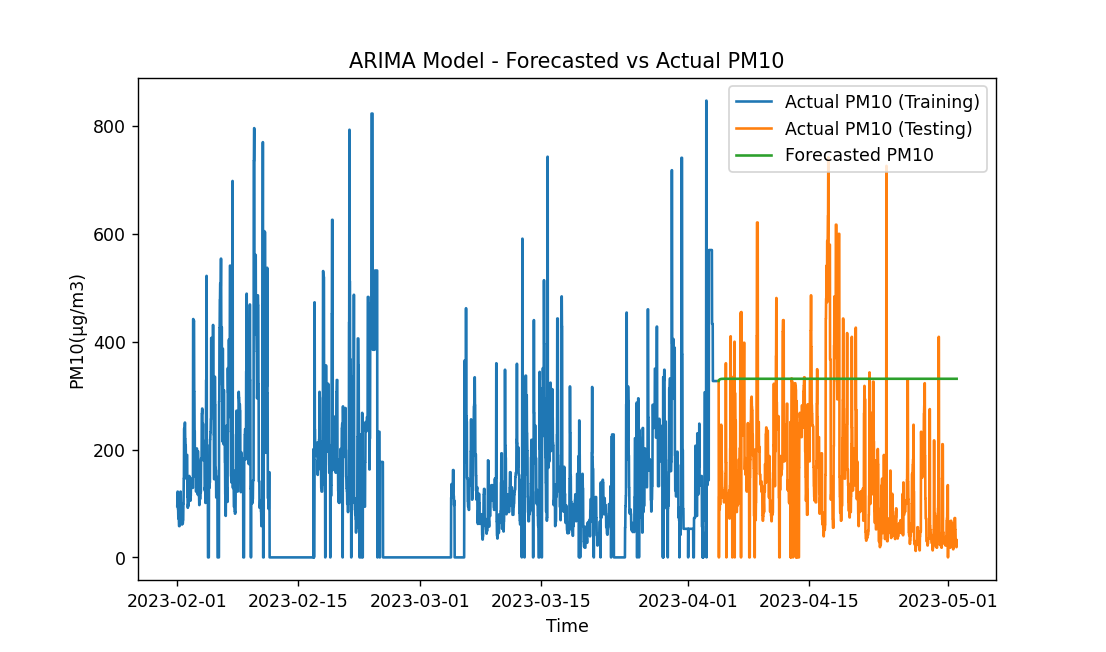

In [82]:
# AUTOMATIC
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (3, 1, 2)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data['PM10(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast PM10 values
forecasted_values = arima_model_fit.predict(start=len(training_data), end=len(training_data)+len(testing_data)-1)

# Plot forecasted and actual PM10 values
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['PM10(µg/m3)'], label='Actual PM10 (Training)')
plt.plot(testing_data.index, testing_data['PM10(µg/m3)'], label='Actual PM10 (Testing)')
plt.plot(testing_data.index, forecasted_values, label='Forecasted PM10')
plt.title('ARIMA Model - Forecasted vs Actual PM10')
plt.xlabel('Time')
plt.ylabel('PM10(µg/m3)')
plt.legend()
plt.show()


In [83]:
auto_arima = pm.auto_arima(training_data['Benzene(µg/m3)'], stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


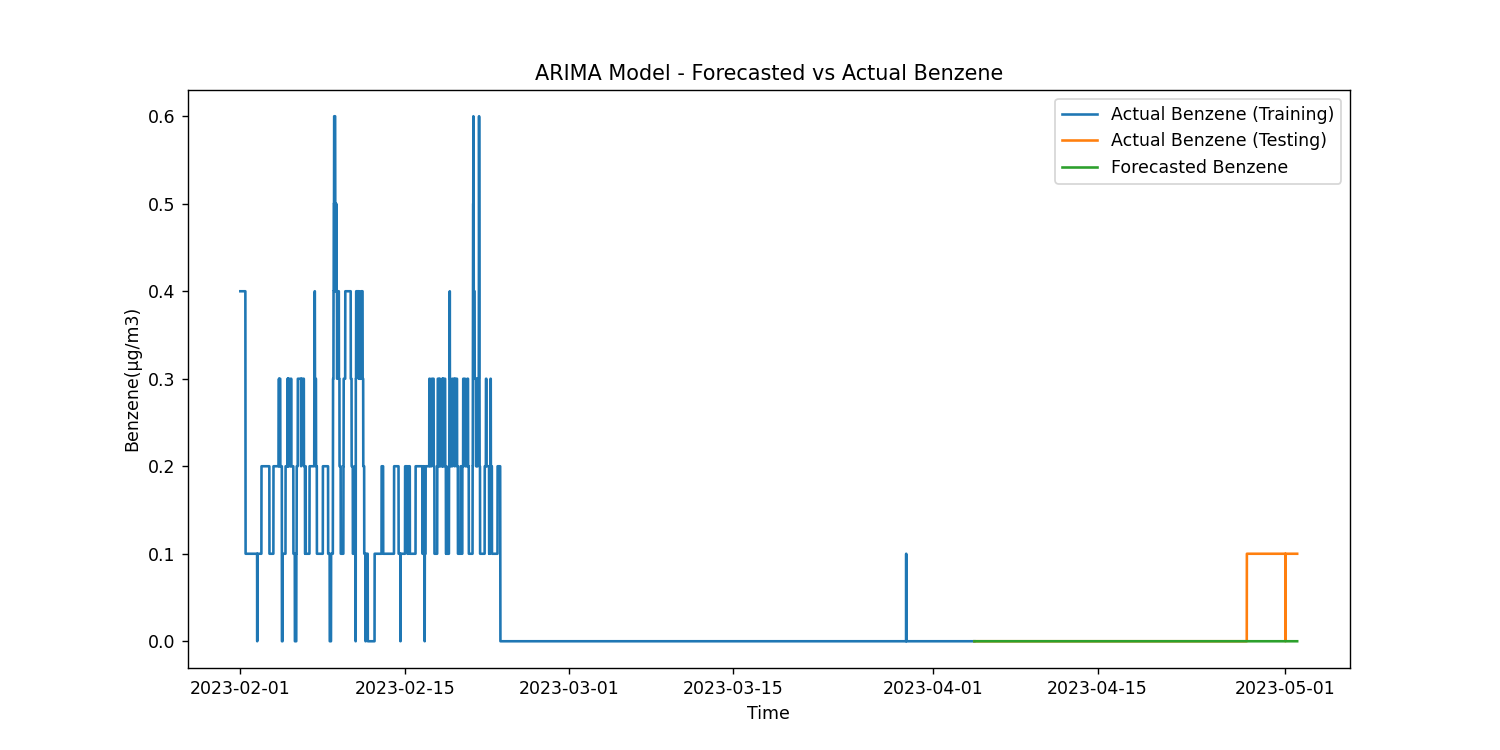

In [84]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (5, 1, 0)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data['Benzene(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast PM10 values
forecasted_values = arima_model_fit.predict(start=len(training_data), end=len(training_data)+len(testing_data)-1)

# Plot forecasted and actual PM10 values
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Benzene(µg/m3)'], label='Actual Benzene (Training)')
plt.plot(testing_data.index, testing_data['Benzene(µg/m3)'], label='Actual Benzene (Testing)')
plt.plot(testing_data.index, forecasted_values, label='Forecasted Benzene')
plt.title('ARIMA Model - Forecasted vs Actual Benzene')
plt.xlabel('Time')
plt.ylabel('Benzene(µg/m3)')
plt.legend()
plt.show()


In [85]:
auto_arima = pm.auto_arima(training_data['NH3(µg/m3)'], stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


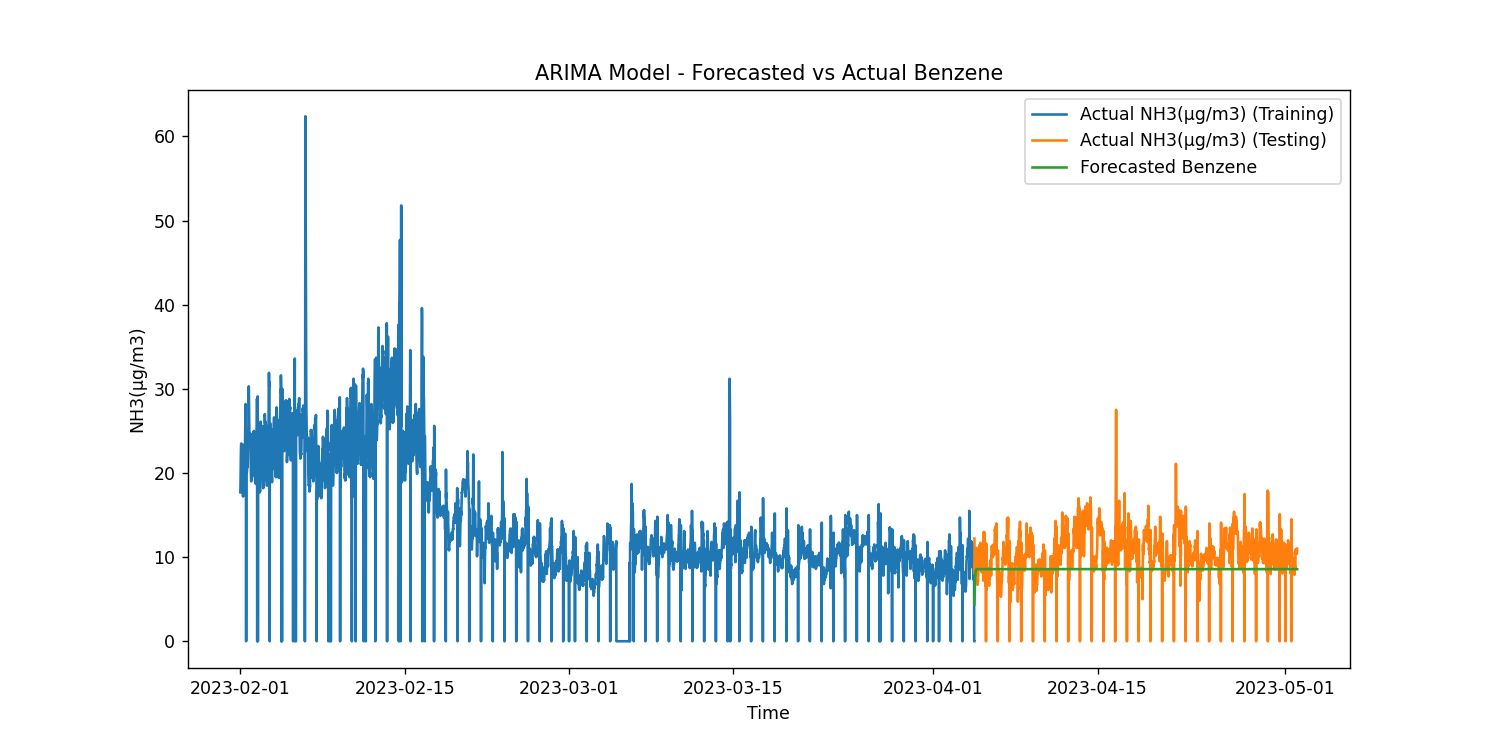

In [86]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (2,1,3)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data['NH3(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast PM10 values
forecasted_values = arima_model_fit.predict(start=len(training_data), end=len(training_data)+len(testing_data)-1)

# Plot forecasted and actual PM10 values
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['NH3(µg/m3)'], label='Actual NH3(µg/m3) (Training)')
plt.plot(testing_data.index, testing_data['NH3(µg/m3)'], label='Actual NH3(µg/m3) (Testing)')
plt.plot(testing_data.index, forecasted_values, label='Forecasted Benzene')
plt.title('ARIMA Model - Forecasted vs Actual NH3')
plt.xlabel('Time')
plt.ylabel('NH3(µg/m3)')
plt.legend()
plt.show()


# ANALYSING DATASET WITH MEAN REPLACED

In [87]:
column_means = data_orig.mean()
# Fill NaN values in each column with the respective column mean
data_mean = data_orig.fillna(column_means)
data_mean.head(1)

C:\Users\Tejaswa\AppData\Local\Temp\ipykernel_24020\1248017061.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = data_orig.mean()


From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                           
1  01-02-2023 0.00  01-02-2023 0.15         95.0          35.0  14.649636   

   NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                          
1        90.1      56.2       0.31   34.232731        17.7          28.1   

   Benzene(µg/m3)  
#                  
1             0.4

<IPython.core.display.Javascript object>


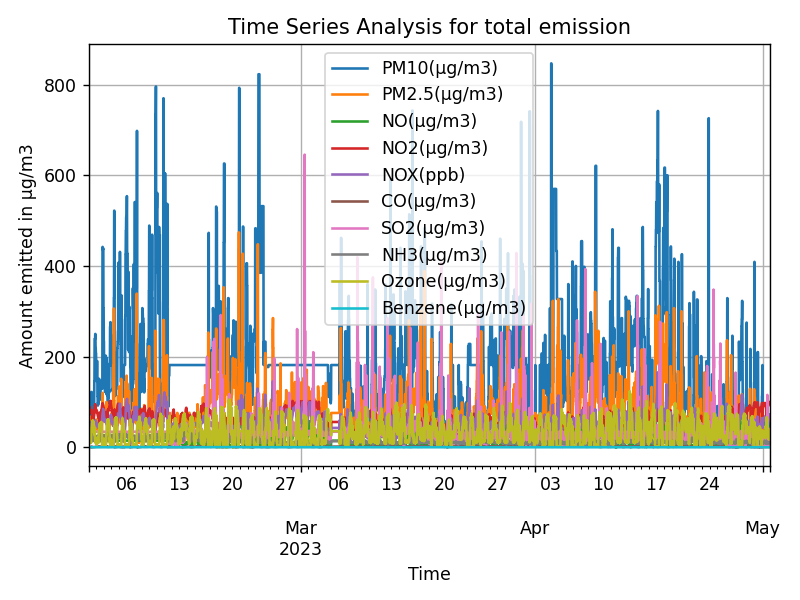

In [88]:
# Plotting time series of dataset Replaced NULL values with mean

data_mean['To'] = pd.to_datetime(data_mean['To'], format='%d-%m-%Y %H.%M')
data_mean['From'] = pd.to_datetime(data_mean['From'], format='%d-%m-%Y %H.%M')
data_mean.drop(['From'], axis = 1, inplace = True)
%matplotlib notebook
data_mean.set_index(['To'], inplace=True)
data_mean.plot()
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Time Series Analysis for total emission')
plt.tight_layout()
plt.grid()
plt.legend()

In [89]:
t = 6000  # Index to split the data
training_data_mean = data_mean.iloc[:t+1].copy()
testing_data_mean = data_mean.iloc[t+1:].copy()

<IPython.core.display.Javascript object>


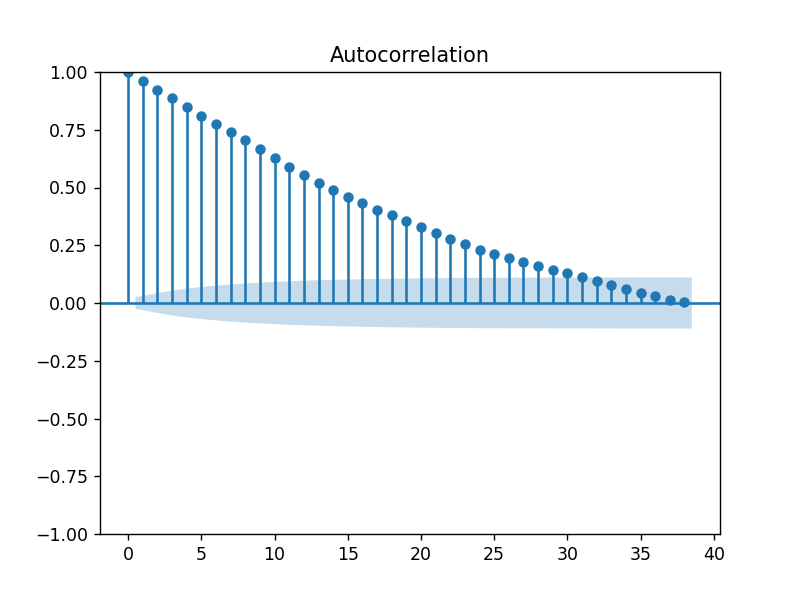

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


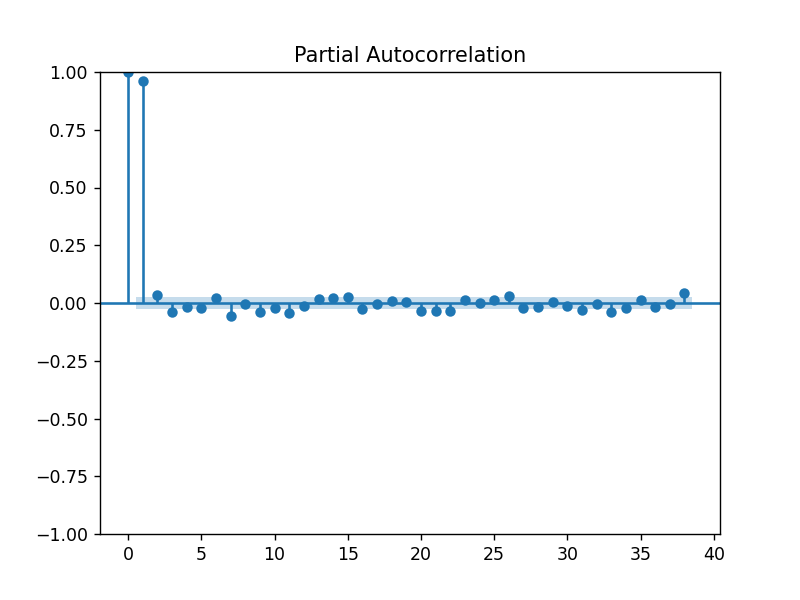

In [90]:
acf_plot_mean = plot_acf(training_data_mean['Benzene(µg/m3)'])
pacf_plot_mean = plot_pacf(training_data_mean['Benzene(µg/m3)'])

In [91]:
# Now forecasting mean replaced dataset

import pmdarima as pm
auto_arima_mean = pm.auto_arima(training_data_mean['Benzene(µg/m3)'], stepwise = False, seasonal = False)
auto_arima_mean
# Automatic method to check best ARIMA model

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


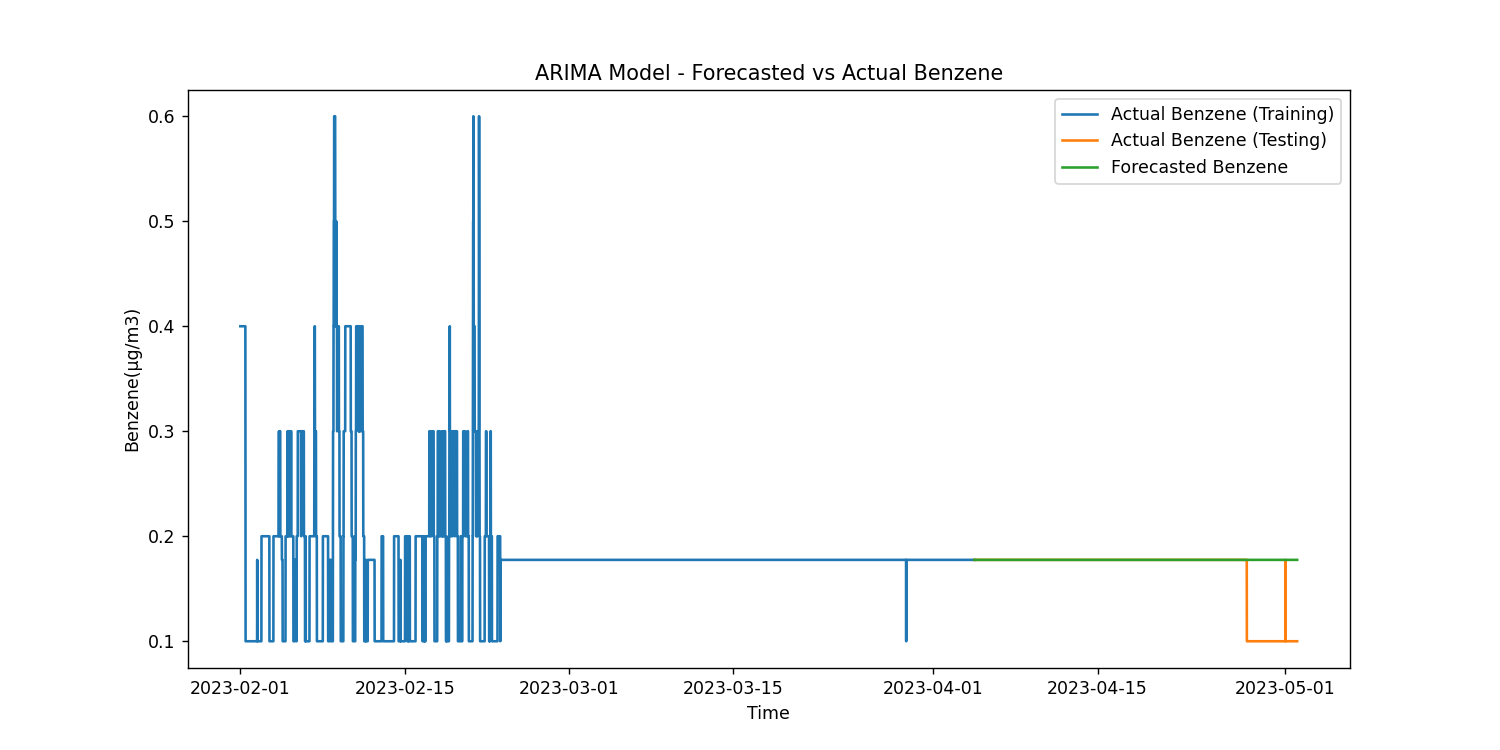

In [92]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (1,1,4)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data_mean['Benzene(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast PM10 values
forecasted_values = arima_model_fit.predict(start=len(training_data), end=len(training_data)+len(testing_data)-1)

# Plot forecasted and actual PM10 values
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data_mean['Benzene(µg/m3)'], label='Actual Benzene (Training)')
plt.plot(testing_data.index, testing_data_mean['Benzene(µg/m3)'], label='Actual Benzene (Testing)')
plt.plot(testing_data.index, forecasted_values, label='Forecasted Benzene')
plt.title('ARIMA Model - Forecasted vs Actual Benzene')
plt.xlabel('Time')
plt.ylabel('Benzene(µg/m3)')
plt.legend()
plt.show()

In [93]:
import pmdarima as pm
auto_arima_mean = pm.auto_arima(training_data_mean['PM10(µg/m3)'], stepwise = False, seasonal = False)
auto_arima_mean
# Automatic method to check best ARIMA model

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


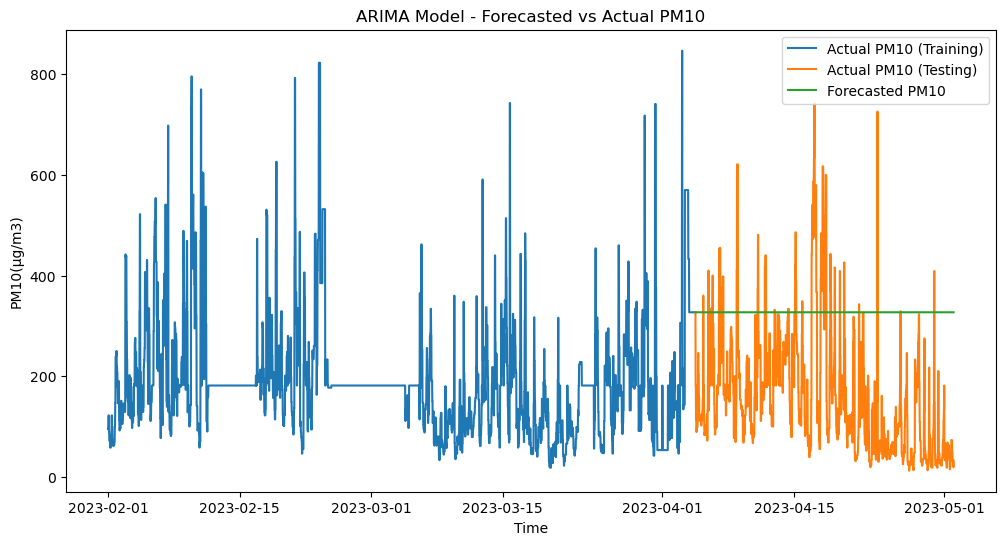

In [120]:
# AUTOMATIC
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (1,1,4)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data_mean['PM10(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast PM10 values
forecasted_values = arima_model_fit.predict(start=len(training_data), end=len(training_data)+len(testing_data)-1)

# Plot forecasted and actual PM10 values
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data_mean['PM10(µg/m3)'], label='Actual PM10 (Training)')
plt.plot(testing_data.index, testing_data_mean['PM10(µg/m3)'], label='Actual PM10 (Testing)')
plt.plot(testing_data.index, forecasted_values, label='Forecasted PM10')
plt.title('ARIMA Model - Forecasted vs Actual PM10')
plt.xlabel('Time')
plt.ylabel('PM10(µg/m3)')
plt.legend()
plt.show()

# Interpolation

In [96]:
data_intr = data_orig.interpolate(method = 'spline', order = 3)
data_intr.head(10)

From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                            
1   01-02-2023 0.00  01-02-2023 0.15         95.0          35.0        NaN   
2   01-02-2023 0.15  01-02-2023 0.30         95.0          35.0        NaN   
3   01-02-2023 0.30  01-02-2023 0.45         95.0          35.0        NaN   
4   01-02-2023 0.45  01-02-2023 1.00        122.0          34.0        NaN   
5   01-02-2023 1.00  01-02-2023 1.15        122.0          34.0        NaN   
6   01-02-2023 1.15  01-02-2023 1.30        122.0          34.0        NaN   
7   01-02-2023 1.30  01-02-2023 1.45        122.0          34.0        NaN   
8   01-02-2023 1.45  01-02-2023 2.00         90.0          35.0        NaN   
9   01-02-2023 2.00  01-02-2023 2.15         90.0          35.0        NaN   
10  01-02-2023 2.15  01-02-2023 2.30         90.0          35.0        NaN   

    NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                           
1         90.1      56.2       0.31         NaN        17.7          28.1   
2         88.0      55.1       0.33         NaN        18.3          27.1   
3         87.7      55.2       0.38         NaN        19.7          24.9   
4         88.9      55.7       0.38         NaN        21.3          21.9   
5         90.0      55.8       0.38         NaN        22.3          16.7   
6         90.2      55.9       0.37         NaN        22.7          16.1   
7         88.9      55.4       0.34         NaN        23.1          22.5   
8         88.9      55.2       0.35         NaN        23.5          20.5   
9         88.9      55.9       0.34         NaN        23.1          22.8   
10        88.9      55.3       0.35         NaN        22.9          19.0   

    Benzene(µg/m3)  
#                   
1              0.4  
2              0.4  
3              0.4  
4              0.4  
5              0.4  
6              0.4  
7              0.4  
8              0.4  
9              0.4  
10             0.4

In [97]:
mean_NO = data_intr['NO(µg/m3)'].mean()
mean_SO2 = data_intr['SO2(µg/m3)'].mean()
data_intr['NO(µg/m3)']  = data_intr['NO(µg/m3)'] .fillna(mean_NO)
data_intr['SO2(µg/m3)']  = data_intr['SO2(µg/m3)'] .fillna(mean_SO2)

In [98]:
data_intr.head(10)

From               To  PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  \
#                                                                            
1   01-02-2023 0.00  01-02-2023 0.15         95.0          35.0  15.469518   
2   01-02-2023 0.15  01-02-2023 0.30         95.0          35.0  15.469518   
3   01-02-2023 0.30  01-02-2023 0.45         95.0          35.0  15.469518   
4   01-02-2023 0.45  01-02-2023 1.00        122.0          34.0  15.469518   
5   01-02-2023 1.00  01-02-2023 1.15        122.0          34.0  15.469518   
6   01-02-2023 1.15  01-02-2023 1.30        122.0          34.0  15.469518   
7   01-02-2023 1.30  01-02-2023 1.45        122.0          34.0  15.469518   
8   01-02-2023 1.45  01-02-2023 2.00         90.0          35.0  15.469518   
9   01-02-2023 2.00  01-02-2023 2.15         90.0          35.0  15.469518   
10  01-02-2023 2.15  01-02-2023 2.30         90.0          35.0  15.469518   

    NO2(µg/m3)  NOX(ppb)  CO(µg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  \
#                                                                           
1         90.1      56.2       0.31   35.484964        17.7          28.1   
2         88.0      55.1       0.33   35.484964        18.3          27.1   
3         87.7      55.2       0.38   35.484964        19.7          24.9   
4         88.9      55.7       0.38   35.484964        21.3          21.9   
5         90.0      55.8       0.38   35.484964        22.3          16.7   
6         90.2      55.9       0.37   35.484964        22.7          16.1   
7         88.9      55.4       0.34   35.484964        23.1          22.5   
8         88.9      55.2       0.35   35.484964        23.5          20.5   
9         88.9      55.9       0.34   35.484964        23.1          22.8   
10        88.9      55.3       0.35   35.484964        22.9          19.0   

    Benzene(µg/m3)  
#                   
1              0.4  
2              0.4  
3              0.4  
4              0.4  
5              0.4  
6              0.4  
7              0.4  
8              0.4  
9              0.4  
10             0.4

In [99]:
t = 6000  # Index to split the data
training_data_intr = data_intr.iloc[:t+1].copy()
testing_data_intr = data_intr.iloc[t+1:].copy()

<IPython.core.display.Javascript object>


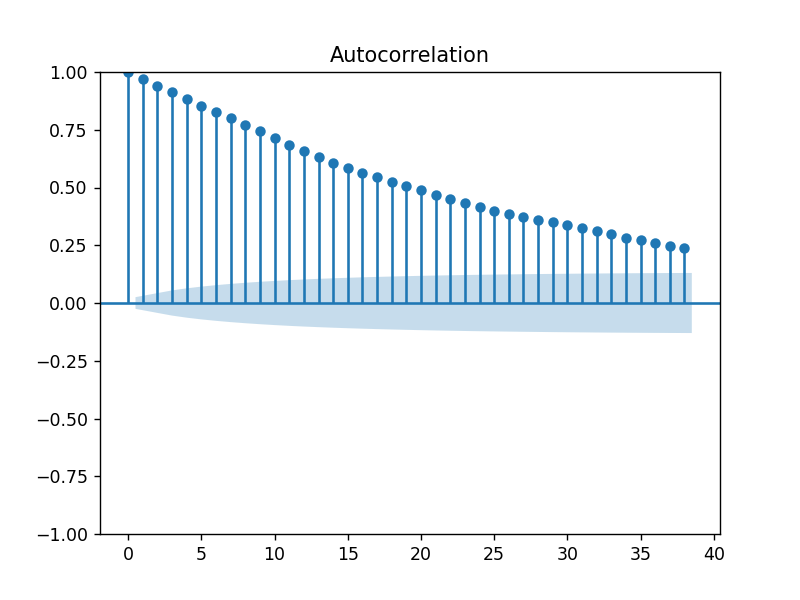

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


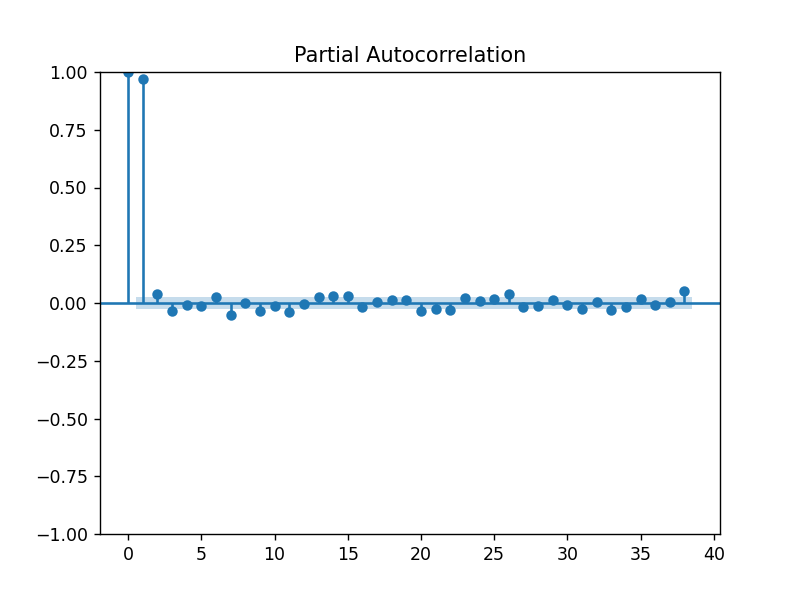

In [100]:
acf_plot_intr = plot_acf(training_data_intr['Benzene(µg/m3)'])
pacf_plot_intr = plot_pacf(training_data_intr['Benzene(µg/m3)'])

In [101]:
import pmdarima as pm
auto_arima = pm.auto_arima(training_data_intr['Benzene(µg/m3)'], stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


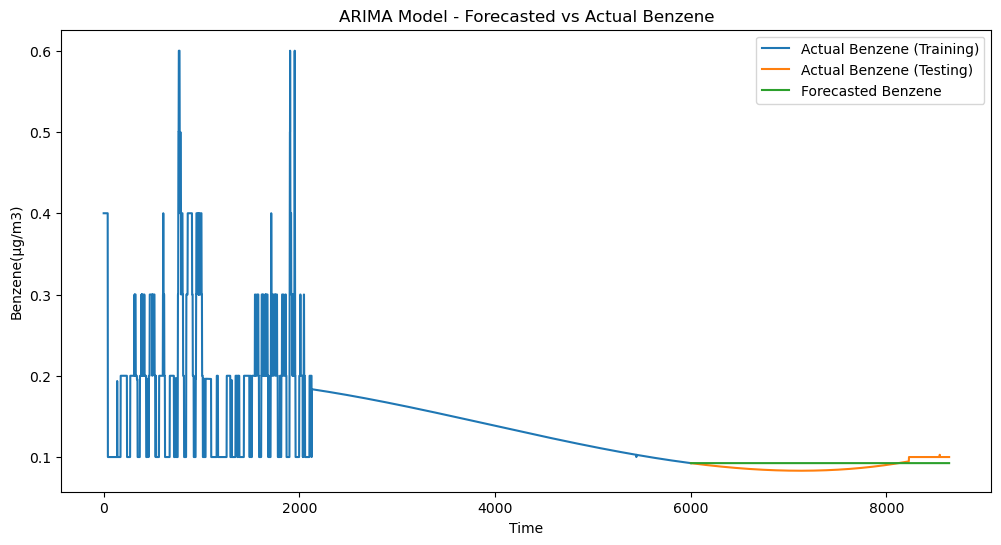

In [109]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (1,1,3)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data_intr['Benzene(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast Benzene values
forecasted_values = arima_model_fit.predict(start=len(training_data_intr), end=len(training_data_intr)+len(testing_data_intr)-1)

# Plot forecasted and actual Benzene values
plt.figure(figsize=(12, 6))
plt.plot(training_data_intr.index, training_data_intr['Benzene(µg/m3)'], label='Actual Benzene (Training)')
plt.plot(testing_data_intr.index, testing_data_intr['Benzene(µg/m3)'], label='Actual Benzene (Testing)')
plt.plot(testing_data_intr.index, forecasted_values, label='Forecasted Benzene')
plt.title('ARIMA Model - Forecasted vs Actual Benzene')
plt.xlabel('Time')
plt.ylabel('Benzene(µg/m3)')
plt.legend()
plt.show()

In [103]:
import pmdarima as pm
auto_arima = pm.auto_arima(training_data_intr['PM10(µg/m3)'], stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(1, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tejaswa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


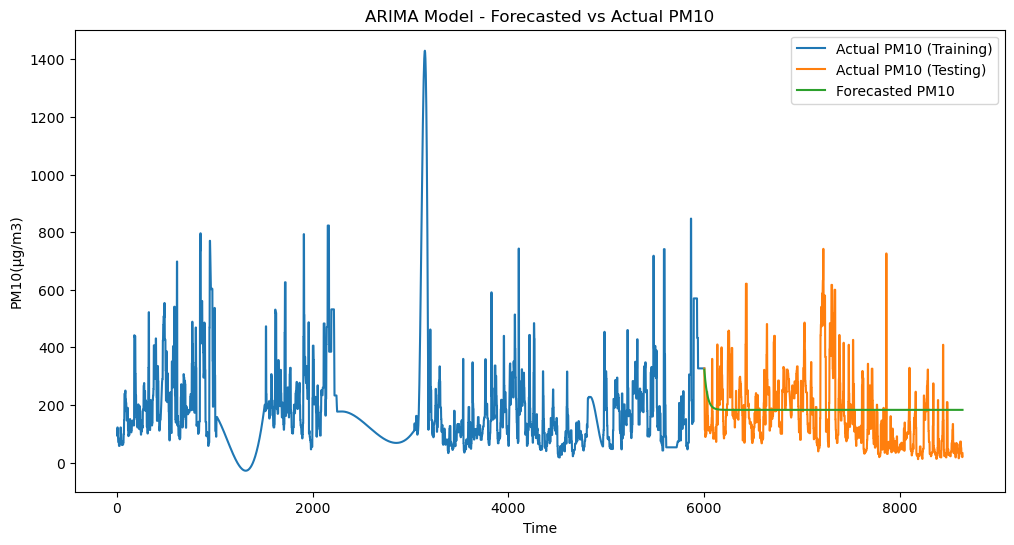

In [107]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

order = (1,0,4)  # Replace with the appropriate order values from your ARIMA model
arima_model = ARIMA(training_data_intr['PM10(µg/m3)'], order=order)
arima_model_fit = arima_model.fit()

# Forecast Benzene values
forecasted_values = arima_model_fit.predict(start=len(training_data_intr), end=len(training_data_intr)+len(testing_data_intr)-1)

# Plot forecasted and actual Benzene values
plt.figure(figsize=(12, 6))
plt.plot(training_data_intr.index, training_data_intr['PM10(µg/m3)'], label='Actual PM10 (Training)')
plt.plot(testing_data_intr.index, testing_data_intr['PM10(µg/m3)'], label='Actual PM10 (Testing)')
plt.plot(testing_data_intr.index, forecasted_values, label='Forecasted PM10')
plt.title('ARIMA Model - Forecasted vs Actual PM10')
plt.xlabel('Time')
plt.ylabel('PM10(µg/m3)')
plt.legend()
plt.show()

The air pollution levels during blasting time are significantly different.


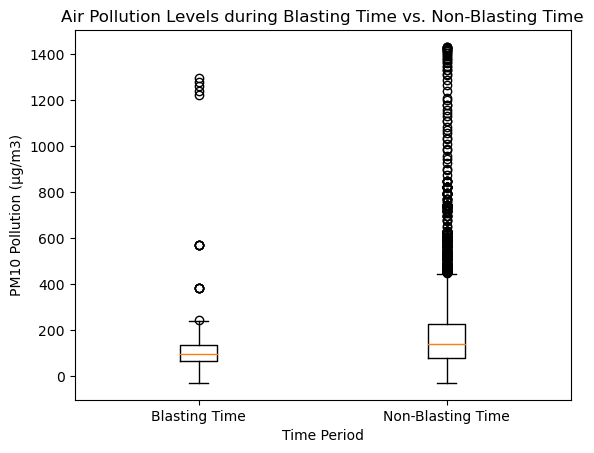

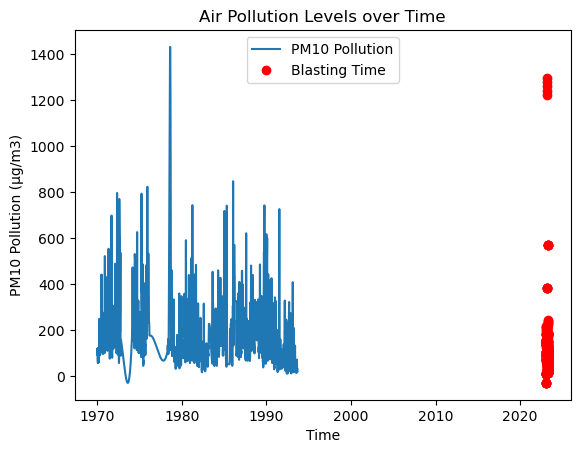

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

# Extract the relevant columns for analysis
blasting_time = data_intr['From']
air_pollution = data_intr['PM10(µg/m3)']

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# Set the blasting time range
blasting_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_end = pd.to_datetime('14:45', format='%H:%M').time()

# Create a boolean mask for blasting time
blasting_mask = (blasting_time.dt.time >= blasting_start) & (blasting_time.dt.time <= blasting_end)

# Create separate Series for air pollution levels during blasting time and other periods
blasting_pollution = air_pollution[blasting_mask]
non_blasting_pollution = air_pollution[~blasting_mask]

# Compare the mean or other statistical measures of air pollution levels
mean_blasting_pollution = blasting_pollution.mean()
mean_non_blasting_pollution = non_blasting_pollution.mean()

# Perform a t-test to determine if the difference is significant
t_statistic, p_value = ttest_ind(blasting_pollution, non_blasting_pollution)

# Analyze the significance level (p-value) to validate the information
if p_value < 0.05:
    print("The air pollution levels during blasting time are significantly different.")
else:
    print("The air pollution levels during blasting time are not significantly different.")

# Visualize the air pollution levels during blasting time and other periods
plt.boxplot([blasting_pollution, non_blasting_pollution], labels=['Blasting Time', 'Non-Blasting Time'])
plt.xlabel('Time Period')
plt.ylabel('PM10 Pollution (µg/m3)')
plt.title('Air Pollution Levels during Blasting Time vs. Non-Blasting Time')
plt.show()

# Create a line plot to visualize the time-series data
plt.plot(air_pollution, label='PM10 Pollution')
plt.plot(blasting_time[blasting_mask], blasting_pollution, 'ro', label='Blasting Time')
plt.xlabel('Time')
plt.ylabel('PM10 Pollution (µg/m3)')
plt.title('Air Pollution Levels over Time')
plt.legend()
plt.show()

In [106]:
# # Convert the blast trigger times to datetime format
# blast_trigger_times = pd.to_datetime(data_intr['From'],format='%d-%m-%Y %H.%M')

# # Create a histogram of the blast trigger times with a fixed number of bins
# plt.hist(blast_trigger_times, bins=50000)
# plt.xlabel('Blast Trigger Times')
# plt.ylabel('Frequency')
# plt.title('Histogram of Blast Trigger Times')
# plt.xticks(rotation=45)
# plt.show()

The air pollution levels during blasting time are significantly different.


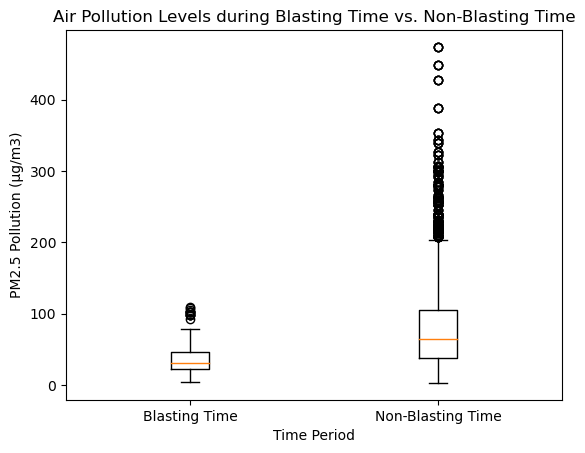

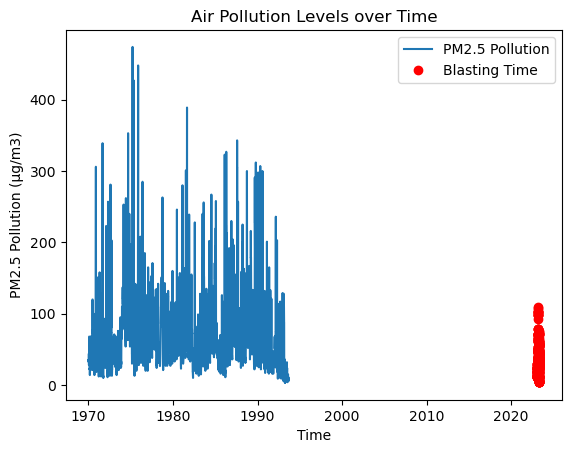

In [112]:
blasting_time = data_intr['From']
air_pollution = data_intr['PM2.5(µg/m3)']

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# Set the blasting time range
blasting_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_end = pd.to_datetime('14:45', format='%H:%M').time()

# Create a boolean mask for blasting time
blasting_mask = (blasting_time.dt.time >= blasting_start) & (blasting_time.dt.time <= blasting_end)

# Create separate Series for air pollution levels during blasting time and other periods
blasting_pollution = air_pollution[blasting_mask]
non_blasting_pollution = air_pollution[~blasting_mask]

# Compare the mean or other statistical measures of air pollution levels
mean_blasting_pollution = blasting_pollution.mean()
mean_non_blasting_pollution = non_blasting_pollution.mean()

# Perform a t-test to determine if the difference is significant
t_statistic, p_value = ttest_ind(blasting_pollution, non_blasting_pollution)

# Analyze the significance level (p-value) to validate the information
if p_value < 0.05:
    print("The air pollution levels during blasting time are significantly different.")
else:
    print("The air pollution levels during blasting time are not significantly different.")

# Visualize the air pollution levels during blasting time and other periods
plt.boxplot([blasting_pollution, non_blasting_pollution], labels=['Blasting Time', 'Non-Blasting Time'])
plt.xlabel('Time Period')
plt.ylabel('PM2.5 Pollution (µg/m3)')
plt.title('Air Pollution Levels during Blasting Time vs. Non-Blasting Time')
plt.show()

# Create a line plot to visualize the time-series data
plt.plot(air_pollution, label='PM2.5 Pollution')
plt.plot(blasting_time[blasting_mask], blasting_pollution, 'ro', label='Blasting Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Pollution (µg/m3)')
plt.title('Air Pollution Levels over Time')
plt.legend()
plt.show()

The air pollution levels during blasting time are significantly different in the following columns: PM10(µg/m3), PM2.5(µg/m3), NO(µg/m3), NO2(µg/m3), NOX(ppb), CO(µg/m3), SO2(µg/m3), Ozone(µg/m3), Benzene(µg/m3)


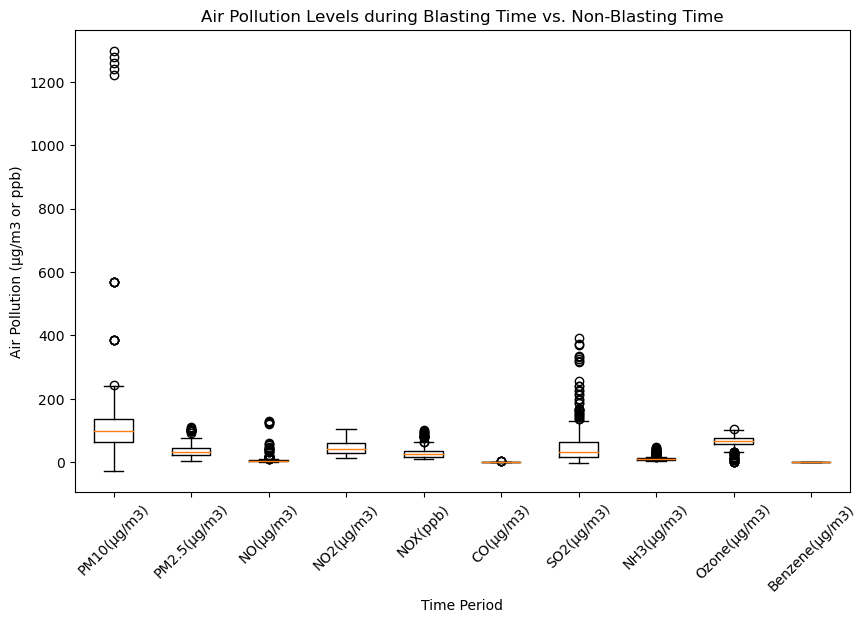

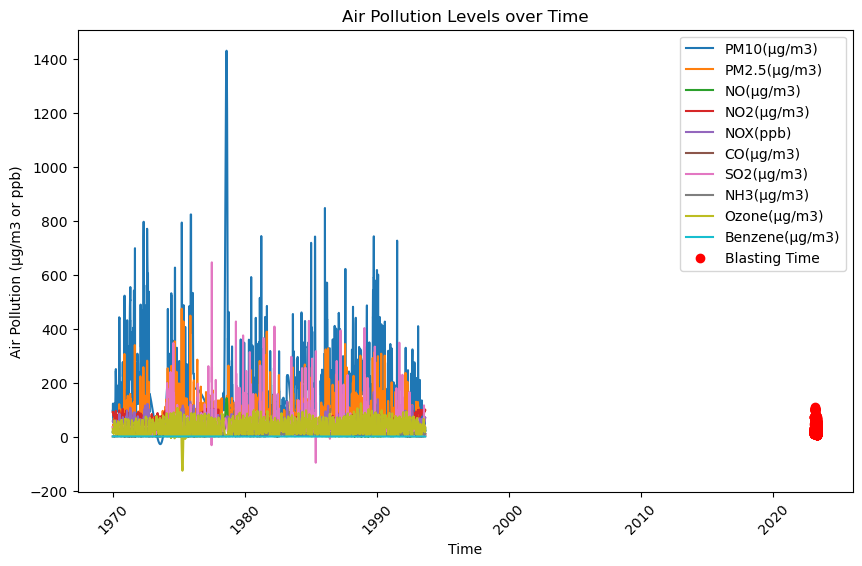

In [119]:
blasting_time = data_intr['From']
air_pollution_columns = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)', 'CO(µg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)', 'Benzene(µg/m3)']
air_pollution = data_intr[air_pollution_columns]

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# Set the blasting time range
blasting_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_end = pd.to_datetime('14:45', format='%H:%M').time()

# Create a boolean mask for blasting time
blasting_mask = (blasting_time.dt.time >= blasting_start) & (blasting_time.dt.time <= blasting_end)

# Create separate DataFrame for air pollution levels during blasting time and other periods
blasting_pollution = air_pollution[blasting_mask]
non_blasting_pollution = air_pollution[~blasting_mask]

# Perform a t-test for each column to determine if the difference is significant
p_values = np.zeros(len(air_pollution_columns))
for i, col in enumerate(air_pollution_columns):
    _, p_values[i] = ttest_ind(blasting_pollution[col], non_blasting_pollution[col])

# Analyze the significance level (p-value) to validate the information for each column
significant_columns = []
for i, col in enumerate(air_pollution_columns):
    if p_values[i] < 0.05:
        significant_columns.append(col)

if len(significant_columns) > 0:
    print("The air pollution levels during blasting time are significantly different in the following columns:", ", ".join(significant_columns))
else:
    print("The air pollution levels during blasting time are not significantly different in any column.")

# Visualize the air pollution levels during blasting time and other periods using box plots
plt.figure(figsize=(10, 6))
plt.boxplot([blasting_pollution[col] for col in air_pollution_columns], labels=air_pollution_columns)
plt.xlabel('Time Period')
plt.ylabel('Air Pollution (µg/m3 or ppb)')
plt.title('Air Pollution Levels during Blasting Time vs. Non-Blasting Time')
plt.xticks(rotation=45)
plt.show()

# Create a line plot to visualize the time-series data
plt.figure(figsize=(10, 6))
for col in air_pollution_columns:
    plt.plot(air_pollution[col], label=col)
plt.plot(blasting_time[blasting_mask], blasting_pollution['PM2.5(µg/m3)'], 'ro', label='Blasting Time')
plt.xlabel('Time')
plt.ylabel('Air Pollution (µg/m3 or ppb)')
plt.title('Air Pollution Levels over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

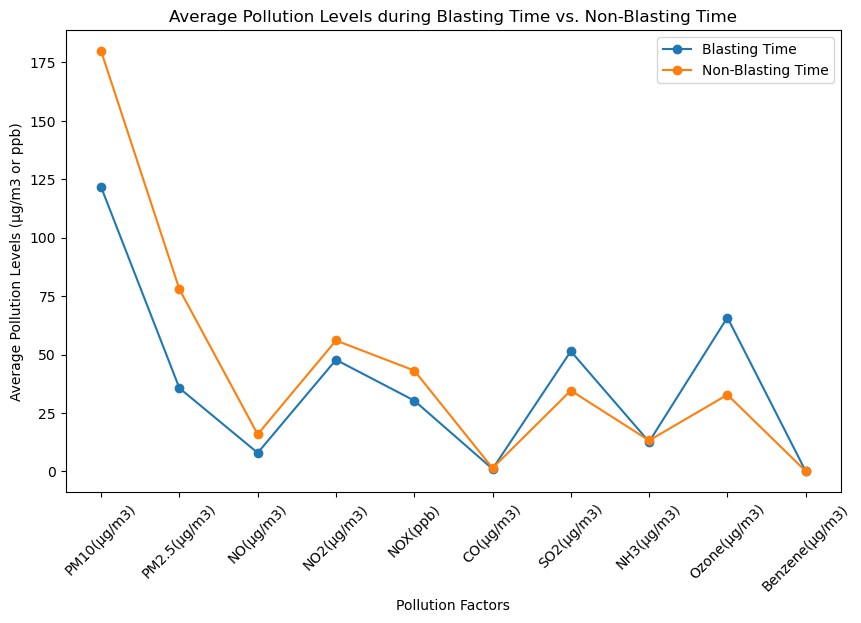

In [117]:
blasting_time = data_intr['From']
air_pollution_columns = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)', 'CO(µg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)', 'Benzene(µg/m3)']
air_pollution = data_intr[air_pollution_columns]

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time,  format='%d-%m-%Y %H.%M')

# Set the blasting time range
blasting_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_end = pd.to_datetime('14:45', format='%H:%M').time()

# Create a boolean mask for blasting time
blasting_mask = (blasting_time.dt.time >= blasting_start) & (blasting_time.dt.time <= blasting_end)

# Calculate the average pollution levels for blasting and non-blasting time periods
blasting_avg_pollution = air_pollution[blasting_mask].mean()
non_blasting_avg_pollution = air_pollution[~blasting_mask].mean()

# Plot the average pollution levels for blasting and non-blasting time periods
plt.figure(figsize=(10, 6))
plt.plot(blasting_avg_pollution, marker='o', label='Blasting Time')
plt.plot(non_blasting_avg_pollution, marker='o', label='Non-Blasting Time')
plt.xlabel('Pollution Factors')
plt.ylabel('Average Pollution Levels (µg/m3 or ppb)')
plt.title('Average Pollution Levels during Blasting Time vs. Non-Blasting Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [126]:

# # Assuming you have the data in a DataFrame called 'data_intr'
# blasting_time = data_intr['From']
# air_pollution_columns = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)', 'CO(µg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)', 'Benzene(µg/m3)']

# # Convert blasting time to datetime format
# blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# # Set the blasting time range
# blasting_start = pd.to_datetime('13:45', format='%H:%M').time()
# blasting_end = pd.to_datetime('14:45', format='%H:%M').time()

# # Create a boolean mask for blasting time
# blasting_mask = (blasting_time.dt.time >= blasting_start) & (blasting_time.dt.time <= blasting_end)

# # Filter the data to get rows corresponding to blasting time
# blasting_data = data_intr[blasting_mask]

# # Print the blasting data
# print(blasting_data)

<IPython.core.display.Javascript object>


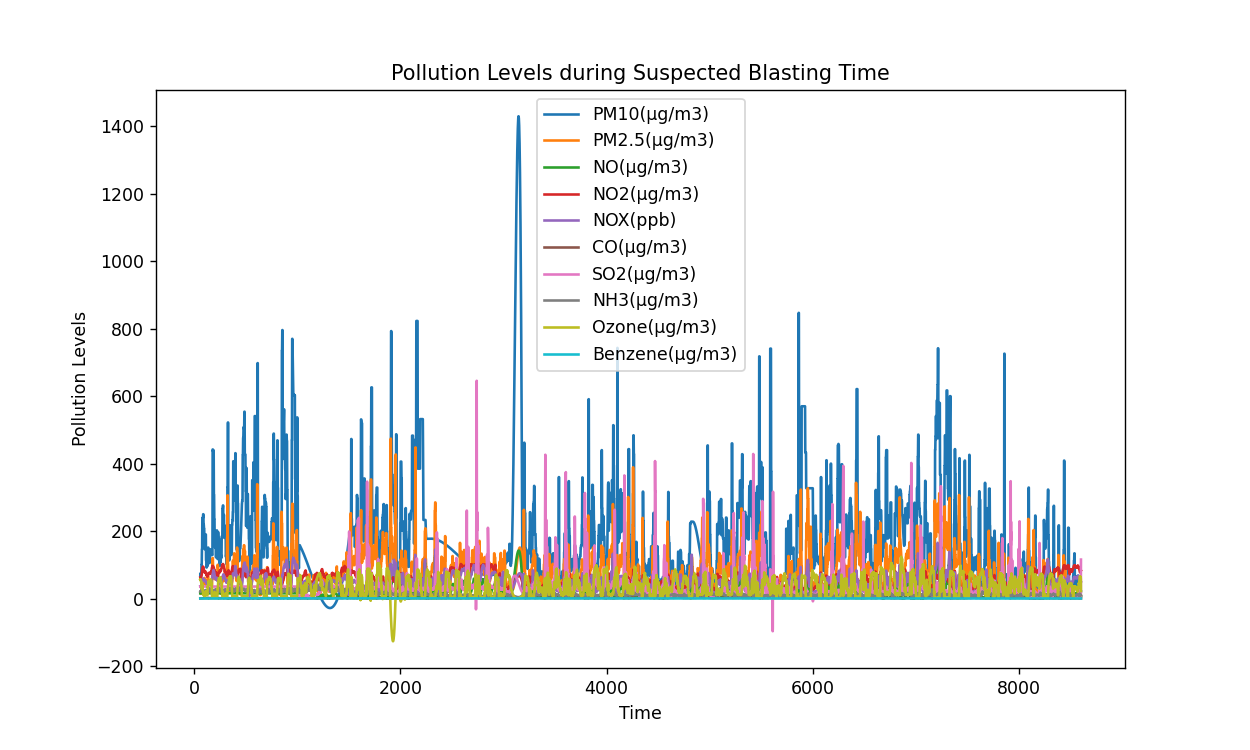

In [135]:
%matplotlib notebook
blasting_time = data_intr['From']
air_pollution_columns = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)', 'CO(µg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)', 'Benzene(µg/m3)']
air_pollution = data_intr[air_pollution_columns]

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# Set the suspected blasting time window
blasting_window_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_window_end = pd.to_datetime('14:45', format='%H:%M').time()

# Find the index range of suspected blasting time
blasting_start_index = blasting_time.index[blasting_time.dt.time == blasting_window_start][0]
blasting_end_index = blasting_time.index[blasting_time.dt.time == blasting_window_end][-1]

# Subset the pollution data within the suspected blasting time window
blasting_pollution = air_pollution.iloc[blasting_start_index:blasting_end_index+1]

# Plot the pollution data within the suspected blasting time window
plt.figure(figsize=(10, 6))
for column in blasting_pollution.columns:
    plt.plot(blasting_pollution[column], label=column)
plt.xlabel('Time')
plt.ylabel('Pollution Levels')
plt.title('Pollution Levels during Suspected Blasting Time')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


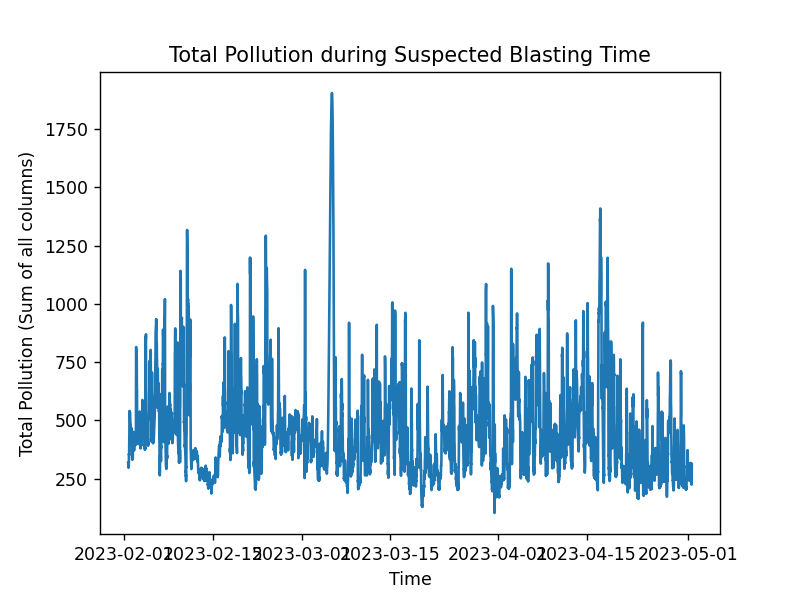

In [124]:
%matplotlib notebook
blasting_time = data_intr['From']
air_pollution_columns = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)', 'CO(µg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)', 'Benzene(µg/m3)']
air_pollution = data_intr[air_pollution_columns]

# Convert blasting time to datetime format
blasting_time = pd.to_datetime(blasting_time, format='%d-%m-%Y %H.%M')

# Set the suspected blasting time window
blasting_window_start = pd.to_datetime('13:45', format='%H:%M').time()
blasting_window_end = pd.to_datetime('14:45', format='%H:%M').time()

# Find the index range of suspected blasting time
blasting_start_index = blasting_time.index[blasting_time.dt.time == blasting_window_start][0]
blasting_end_index = blasting_time.index[blasting_time.dt.time == blasting_window_end][-1]

# Calculate the sum of pollution across all columns within the suspected blasting time window
blasting_total_pollution = air_pollution.iloc[blasting_start_index:blasting_end_index+1].sum(axis=1)

# Plot the total pollution during the suspected blasting time window
plt.plot(blasting_time[blasting_start_index:blasting_end_index+1], blasting_total_pollution)
plt.xlabel('Time')
plt.ylabel('Total Pollution (Sum of all columns)')
plt.title('Total Pollution during Suspected Blasting Time')
plt.show()

<IPython.core.display.Javascript object>


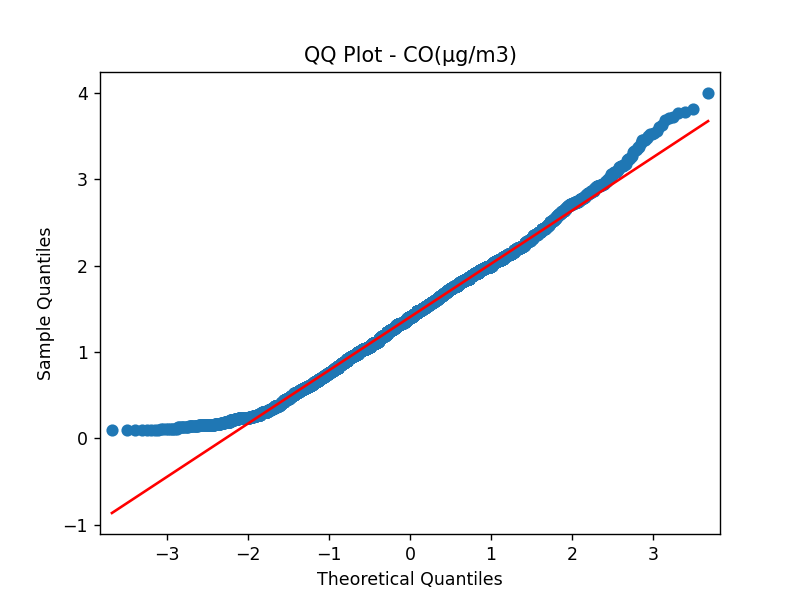

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Select the column you want to create a QQ plot for
column_name = 'CO(µg/m3)'  # Replace 'PM10' with the desired column name from your dataset

# Extract the column data
dataqq = data_intr[column_name]

# Generate theoretical quantiles
theoretical_quantiles = sm.ProbPlot(dataqq).theoretical_quantiles

# Create QQ plot
sm.qqplot(dataqq, line='s')

# Customize the plot
plt.title(f"QQ Plot - {column_name}")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plot
plt.show()


In [153]:
# from scipy.stats import normaltest

# # Perform normality test on the data
# statistic, p_value = normaltest(data_intr['CO(µg/m3)'])

# # Check if the data follows a normal distribution
# alpha = 0.05  # Significance level
# if p_value < alpha:
#     print("The data does not follow a normal distribution.")
# else:
#     print("The data follows a normal distribution.")

The data does not follow a normal distribution.


<IPython.core.display.Javascript object>


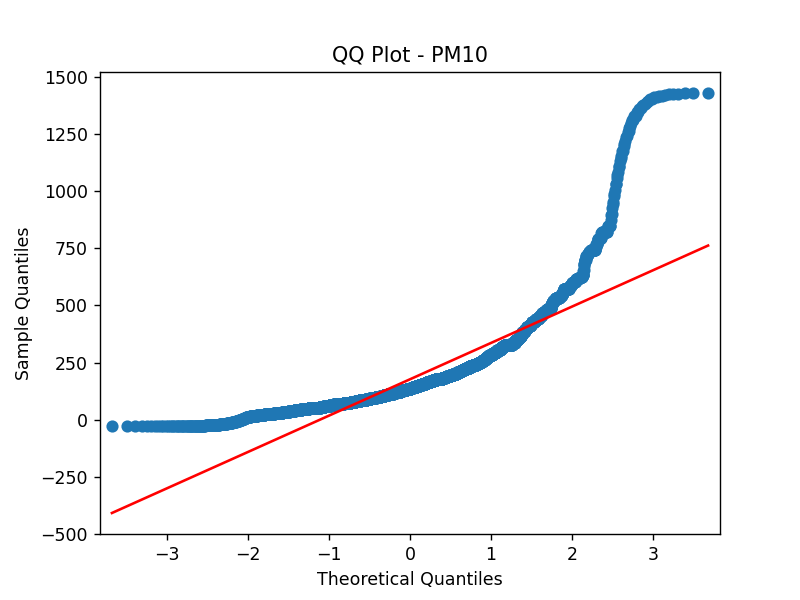

In [156]:
# Extract the column data
dataqq = data_intr['PM10(µg/m3)']

# Generate theoretical quantiles
theoretical_quantiles = sm.ProbPlot(dataqq).theoretical_quantiles

# Create QQ plot
sm.qqplot(dataqq, line='s')

# Customize the plot
plt.title(f"QQ Plot - PM10")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plot
plt.show()


# Question Statements

In [ ]:
Forecasting:

1-> Can we use time series methods like AR, MA, ARMA, or ARIMA to forecast future air pollution levels during blasting time?
2-> How accurate are these forecasting models in predicting the air pollution levels?

Curve fitting:

1->Can we fit a curve to the air pollution data to identify relationships between variables?
2->Are there any non-linear patterns or trends in the air pollution data?